# Инициализация

In [1]:
#!pip install h2o

In [2]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu120.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu120.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpj0364hhc
  JVM stdout: /tmp/tmpj0364hhc/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpj0364hhc/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,09 secs
H2O_cluster_timezone:,Etc/GMT
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.2
H2O_cluster_version_age:,1 month and 9 days
H2O_cluster_name:,H2O_from_python_unknownUser_kdfl6v
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.926 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


# Подготовка данных

In [3]:
# подключу гугл диск
#from google.colab import drive
#drive.mount('/content/drive')

#data_path = "drive/MyDrive/Colab Notebooks/Healthcare/train_data__df2catencode_ultimate.csv"
data_path = "train_data__df2catencode_ultimate.csv"

# Load data into H2O
df = h2o.import_file(data_path)
df = df.drop('C1')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [4]:
df

Hospital_code,Bed_Grade,Severity_of_Illness,Visitors_with_Patient,Age,Department,Ward_Type,Type_of_Admission,Stay,Ward_Facility_Code_At_Hospital_type_code
8,2,3,2,55,31.9855,31.9855,31.9855,5,50
2,2,3,2,55,18.4928,31.9855,31.9855,45,50
10,2,3,2,55,31.9855,38.4928,38.4928,35,50
26,2,3,2,55,27.3285,18.4928,37.3285,45,50
26,2,3,2,55,31.7464,37.3285,39.2464,45,50
23,2,3,2,55,33.4928,39.2464,40.3971,15,35.4403
32,3,3,2,55,34.3971,34.3971,18.4928,5,50
23,3,3,2,55,29.4976,31.9855,36.1643,45,53.2079
1,4,3,2,55,31.9855,27.3285,37.4265,55,7.81604
10,3,3,2,55,43.4928,29.4976,39.6232,35,50


In [5]:
df.describe()

Rows:318438
Cols:10

,Hospital_code,Bed_Grade,Severity_of_Illness,Visitors_with_Patient,Age,Department,Ward_Type,Type_of_Admission,Stay,Ward_Facility_Code_At_Hospital_type_code
type,int,int,int,int,int,real,real,real,int,real
mins,1.0,1.0,1.0,0.0,5.0,17.328501414194704,18.39710084851682,9.497584040430686,5.0,7.816040607143563
mean,18.31884071624619,2.625653973457944,1.908462557860556,3.284099259510483,45.27853145667289,32.87907996529925,32.78353585024367,32.736854319240436,31.985504242584113,50.26050156867248
maxs,32.0,4.0,3.0,32.0,95.0,43.49275212129206,43.56943676256436,40.39710084851682,105.0,112.9535469594144
sigma,8.633754885795051,0.8730604938237946,0.6628857004044931,1.7640613895592008,19.585263126066604,1.0316564756930529,4.116346744445846,1.7714040252455794,21.500751611391166,5.7697512884693944
zeros,0,0,0,22,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0
0,8.0,2.0,3.0,2.0,55.0,31.985504242584113,31.985504242584113,31.985504242584113,5.0,50.0
1,2.0,2.0,3.0,2.0,55.0,18.492752121292057,31.985504242584113,31.985504242584113,45.0,50.0
2,10.0,2.0,3.0,2.0,55.0,31.985504242584113,38.49275212129206,38.49275212129206,35.0,50.0


In [6]:
train, valid, unseen = df.split_frame(ratios=[0.7, 0.15])
train

Hospital_code,Bed_Grade,Severity_of_Illness,Visitors_with_Patient,Age,Department,Ward_Type,Type_of_Admission,Stay,Ward_Facility_Code_At_Hospital_type_code
8,2,3,2,55,31.9855,31.9855,31.9855,5,50
10,2,3,2,55,31.9855,38.4928,38.4928,35,50
26,2,3,2,55,31.7464,37.3285,39.2464,45,50
23,2,3,2,55,33.4928,39.2464,40.3971,15,35.4403
32,3,3,2,55,34.3971,34.3971,18.4928,5,50
23,3,3,2,55,29.4976,31.9855,36.1643,45,53.2079
1,4,3,2,55,31.9855,27.3285,37.4265,55,7.81604
22,2,3,2,55,31.7122,30.2836,31.9855,25,45.8617
26,1,3,2,55,30.8732,34.2464,28.4928,15,50
16,3,3,2,55,29.1095,30.3971,13.9952,5,67.0408


In [7]:
valid

Hospital_code,Bed_Grade,Severity_of_Illness,Visitors_with_Patient,Age,Department,Ward_Type,Type_of_Admission,Stay,Ward_Facility_Code_At_Hospital_type_code
26,2,3,2,55,27.3285,18.4928,37.3285,45,50
10,3,3,2,55,43.4928,29.4976,39.6232,35,50
6,3,3,2,75,40.6618,38.4928,11.7464,5,40.7673
32,3,1,2,75,26.6866,27.4657,13.3561,15,96.568
19,3,1,4,75,25.9991,26.6866,13.4657,75,77.5097
26,2,2,3,30,24.1866,24.8116,15.9436,45,54.349
19,3,2,6,30,28.5256,28.3493,21.0469,105,86.2511
6,3,3,4,55,32.3493,25.9991,23.9994,55,18.9373
23,1,3,4,55,17.3285,26.9466,24.8794,55,24.09
31,2,2,2,85,33.4279,26.3698,25.2183,5,53.5096


In [8]:
unseen

Hospital_code,Bed_Grade,Severity_of_Illness,Visitors_with_Patient,Age,Department,Ward_Type,Type_of_Admission,Stay,Ward_Facility_Code_At_Hospital_type_code
2,2,3,2,55,18.4928,31.9855,31.9855,45,50
29,3,3,2,75,27.3285,29.1095,9.49758,15,63.402
21,3,3,2,75,26.1643,28.0821,36.3066,15,48.9746
27,2,2,2,30,25.8732,24.6986,33.1659,25,97.4085
19,2,2,2,45,28.6986,27.2488,10.8732,5,100.83
26,1,2,2,45,26.5441,25.5373,32.7361,35,56.7333
27,3,2,2,30,27.4729,28.1659,16.5874,5,97.686
14,2,2,3,30,26.3493,30.7721,25.9979,15,21.7379
28,2,2,3,30,24.4994,26.5411,32.8493,25,44.154
6,4,2,6,30,23.5539,26.4794,24.9028,35,26.6617


In [9]:
y = "Stay"
x = train.columns
x.remove(y)

# Тренировка модели

In [10]:
#aml = H2OAutoML(max_runtime_secs = 1000, seed = 1)
aml = H2OAutoML(max_models = 10, seed = 1)
#aml = H2OAutoML(max_runtime_secs = 1000)
aml.train(x = x, y = y, training_frame = df, validation_frame=valid)

AutoML progress: |
03:34:42.586: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

█████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),6/10
# GBM base models (used / total),1/4
# XGBoost base models (used / total),3/3
# DRF base models (used / total),2/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [11]:
lb = aml.leaderboard

In [12]:
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20230904_33442,15.307,234.305,11.0841,0.536166,234.305
StackedEnsemble_BestOfFamily_1_AutoML_1_20230904_33442,15.3217,234.755,11.0936,0.536625,234.755
DRF_1_AutoML_1_20230904_33442,15.4038,237.278,11.1886,0.541316,237.278
XRT_1_AutoML_1_20230904_33442,15.4056,237.333,11.2085,0.542918,237.333
GBM_4_AutoML_1_20230904_33442,15.5317,241.234,11.2053,0.539409,241.234
GBM_1_AutoML_1_20230904_33442,15.538,241.43,11.2482,0.539097,241.43
GBM_3_AutoML_1_20230904_33442,15.578,242.675,11.2299,0.540226,242.675
GBM_2_AutoML_1_20230904_33442,15.6057,243.537,11.252,0.541066,243.537
XGBoost_3_AutoML_1_20230904_33442,15.6643,245.371,11.3062,0.54189,245.371
XGBoost_2_AutoML_1_20230904_33442,15.7162,246.998,11.3644,nan,246.998


In [13]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(lb['model_id'].as_data_frame().iloc[:,0])
model_ids

['StackedEnsemble_AllModels_1_AutoML_1_20230904_33442',
 'StackedEnsemble_BestOfFamily_1_AutoML_1_20230904_33442',
 'DRF_1_AutoML_1_20230904_33442',
 'XRT_1_AutoML_1_20230904_33442',
 'GBM_4_AutoML_1_20230904_33442',
 'GBM_1_AutoML_1_20230904_33442',
 'GBM_3_AutoML_1_20230904_33442',
 'GBM_2_AutoML_1_20230904_33442',
 'XGBoost_3_AutoML_1_20230904_33442',
 'XGBoost_2_AutoML_1_20230904_33442',
 'XGBoost_1_AutoML_1_20230904_33442',
 'GLM_1_AutoML_1_20230904_33442']

In [14]:
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
se

key,value
Stacking strategy,cross_validation
Number of base models (used / total),6/10
# GBM base models (used / total),1/4
# XGBoost base models (used / total),3/3
# DRF base models (used / total),2/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [15]:
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

/usr/local/lib/python3.8/dist-packages/h2o/estimators/stackedensemble.py:925: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


In [16]:
metalearner.coef_norm()

{'Intercept': 31.98550424258438,
 'DRF_1_AutoML_1_20230904_33442': 6.724278167439382,
 'XRT_1_AutoML_1_20230904_33442': 3.9371434462662793,
 'GBM_4_AutoML_1_20230904_33442': 0.0,
 'GBM_1_AutoML_1_20230904_33442': 0.3493898682088573,
 'GBM_3_AutoML_1_20230904_33442': 0.0,
 'GBM_2_AutoML_1_20230904_33442': 0.0,
 'XGBoost_3_AutoML_1_20230904_33442': 1.1981816183578435,
 'XGBoost_2_AutoML_1_20230904_33442': 1.2683984511698587,
 'XGBoost_1_AutoML_1_20230904_33442': 1.833778712374719,
 'GLM_1_AutoML_1_20230904_33442': 0.0}

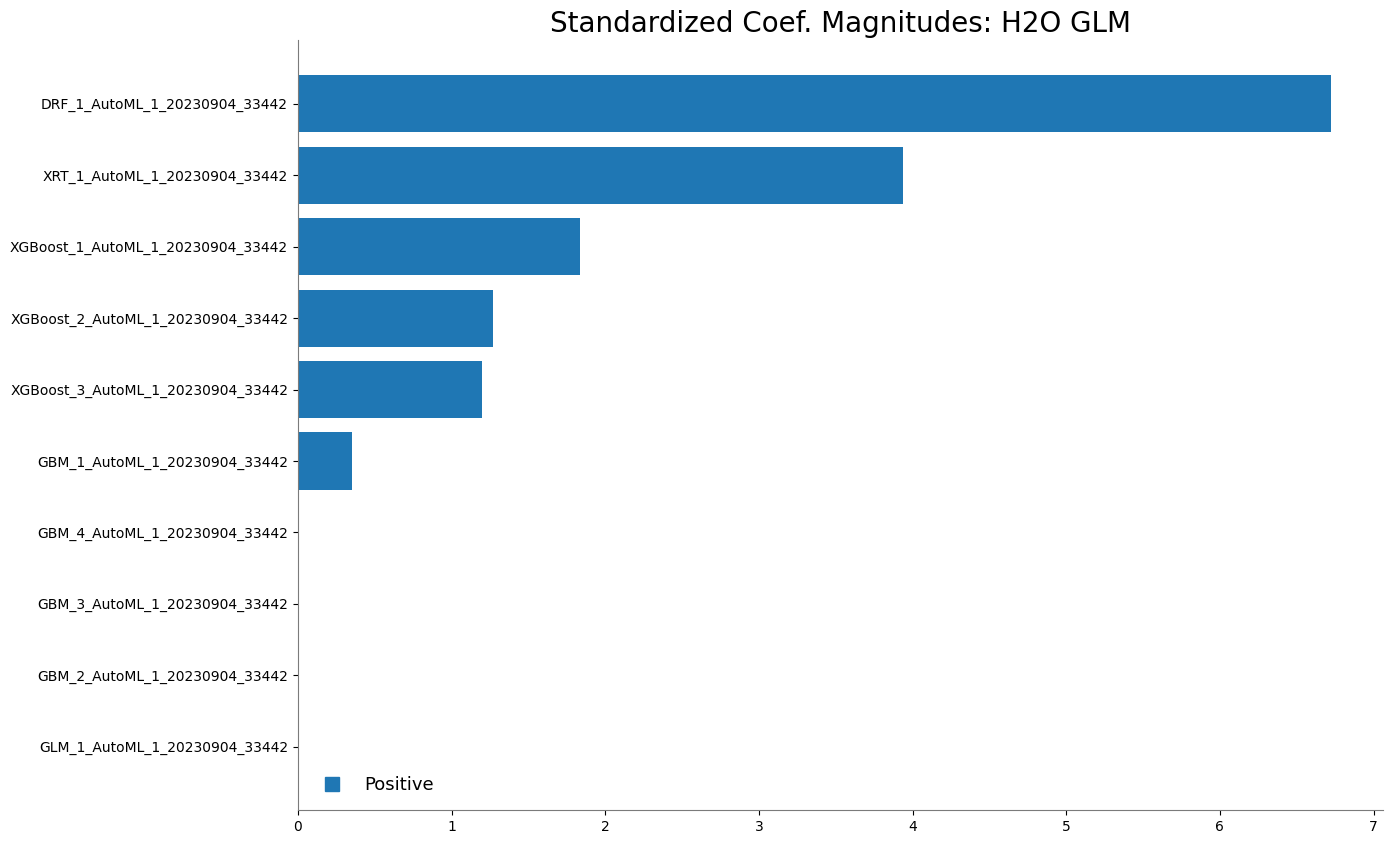

In [17]:
%matplotlib inline
metalearner.std_coef_plot()

# Сравнение моделей на переобученность/недообученность

Model ID: StackedEnsemble_AllModels_1_AutoML_1_20230904_33442
ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 147.38864379591908
RMSE: 12.140372473524817
MAE: 8.809520782119547
RMSLE: 0.4570764429832042
Mean Residual Deviance: 147.38864379591908
R^2: 0.6772282536519066
Null degrees of freedom: 47792
Residual degrees of freedom: 47786
Null deviance: 21824389.87959696
Residual deviance: 7044145.452938361
AIC: 374280.59333803406
R2 cross validation: 0.6829083823444673
R2 test validation: 0.6772282536519066
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
R2 unseen dataset validation: 0.6776591563710389
-------------------
-------------------
Model ID: StackedEnsemble_BestOfFamily_1_AutoML_1_20230904_33442
ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 150.2046854094453
RMSE: 12.255802112038415
MAE: 8.898711963547303
RMSLE: 0.460233458932844
Mean Residual Deviance: 150.2046854094453
R

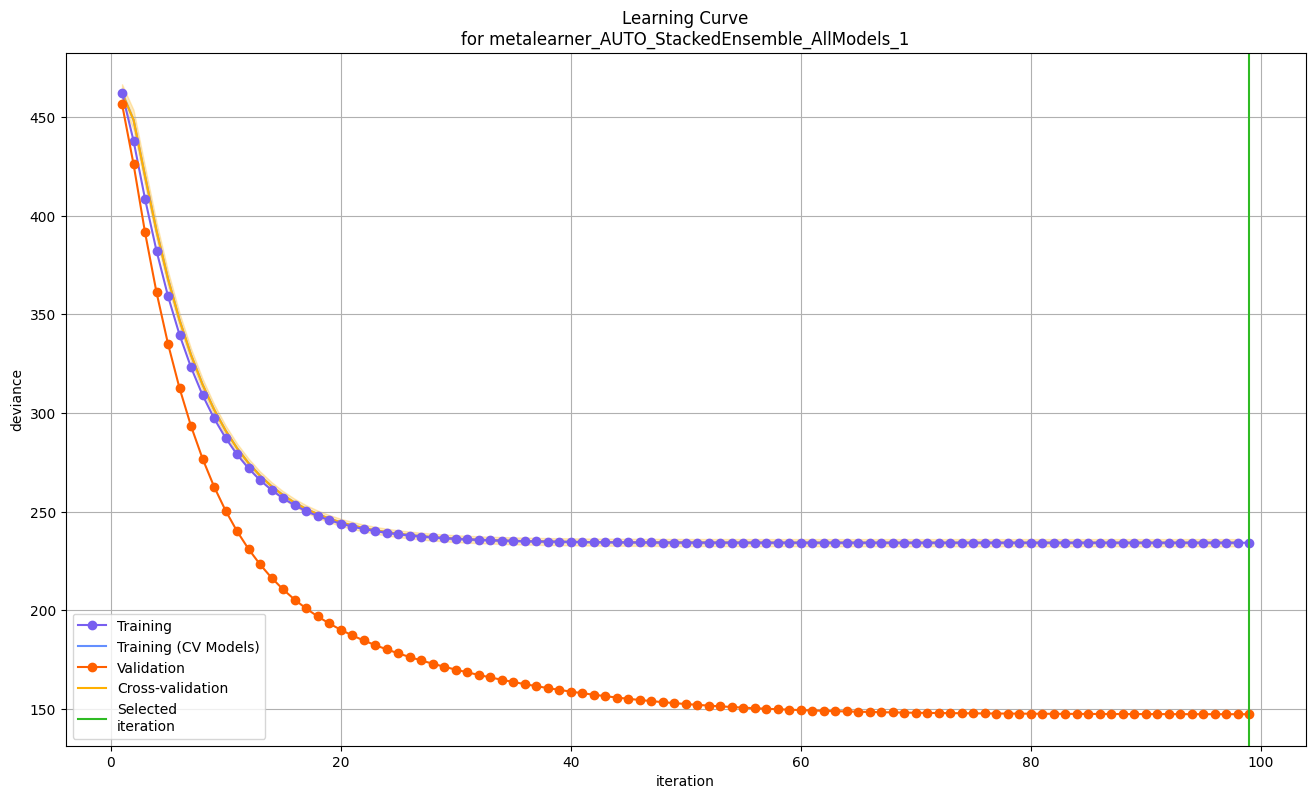

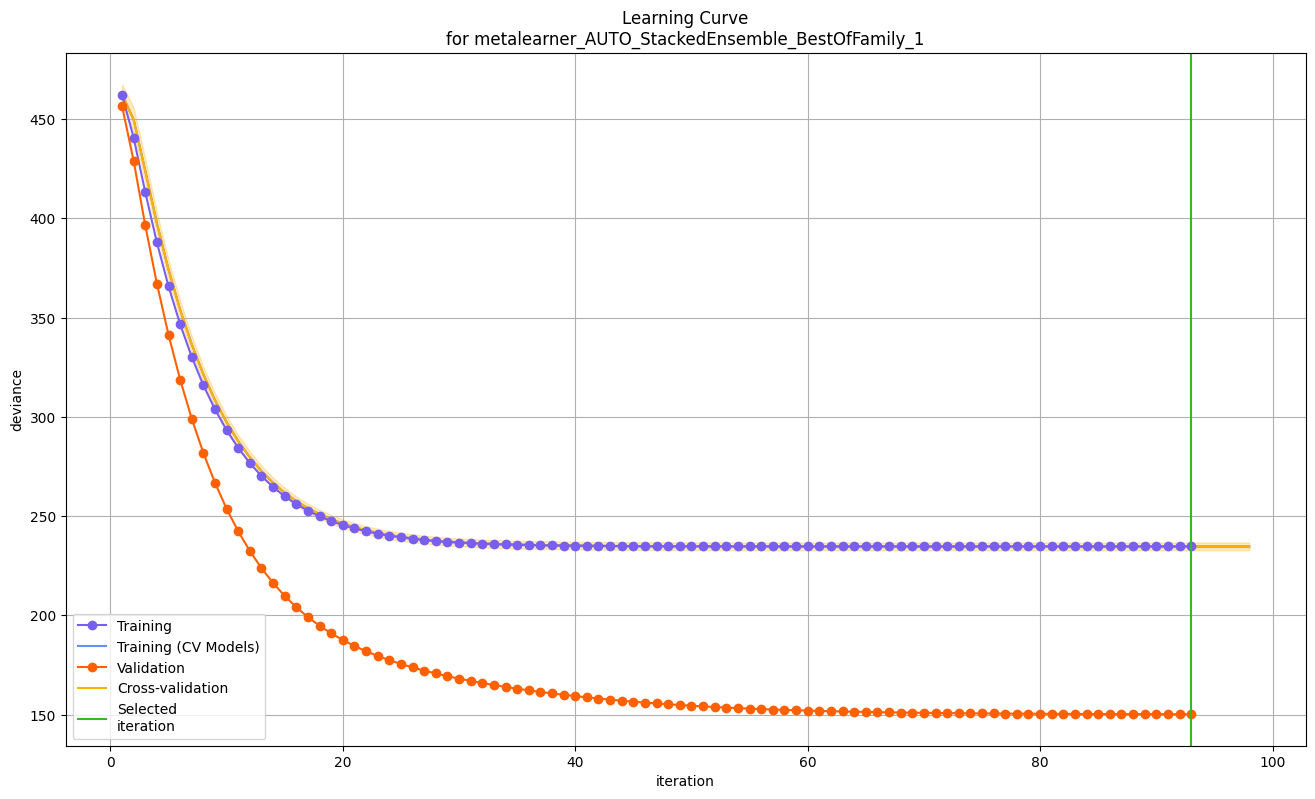

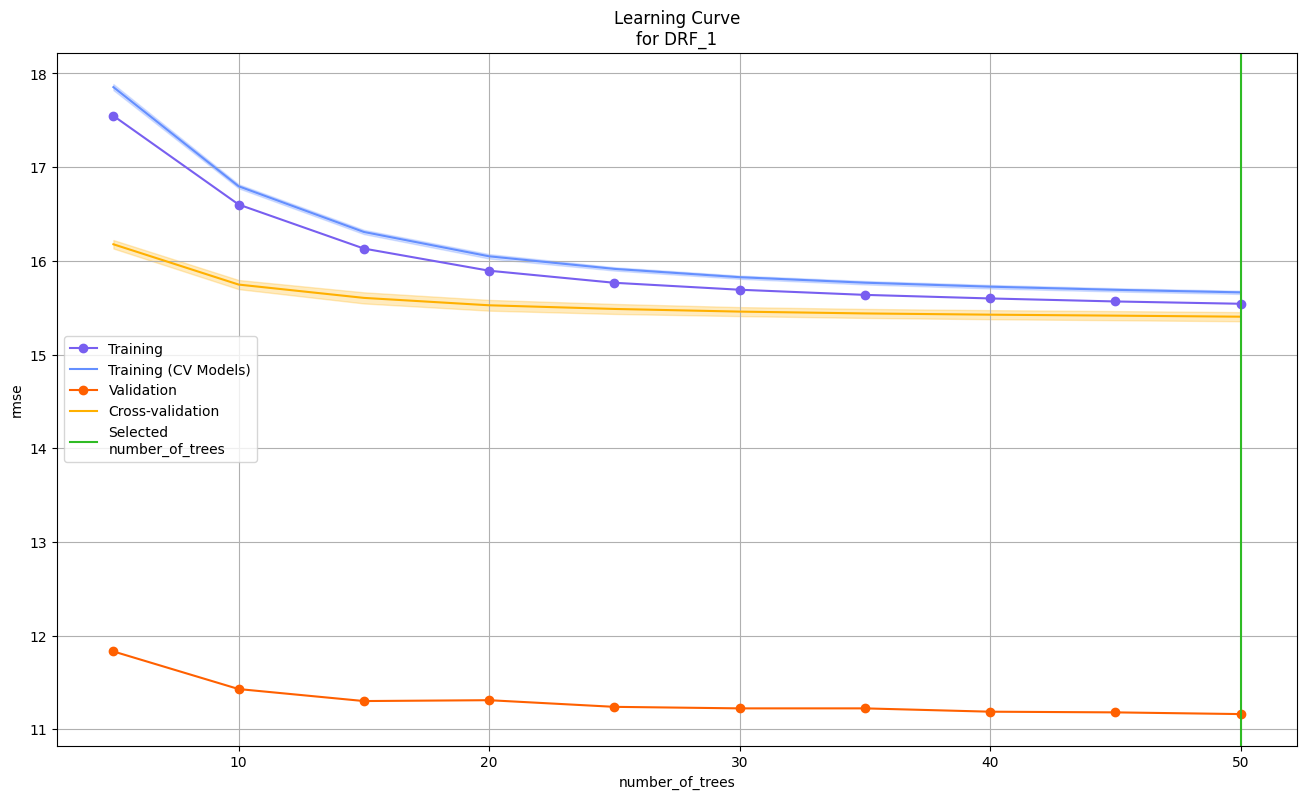

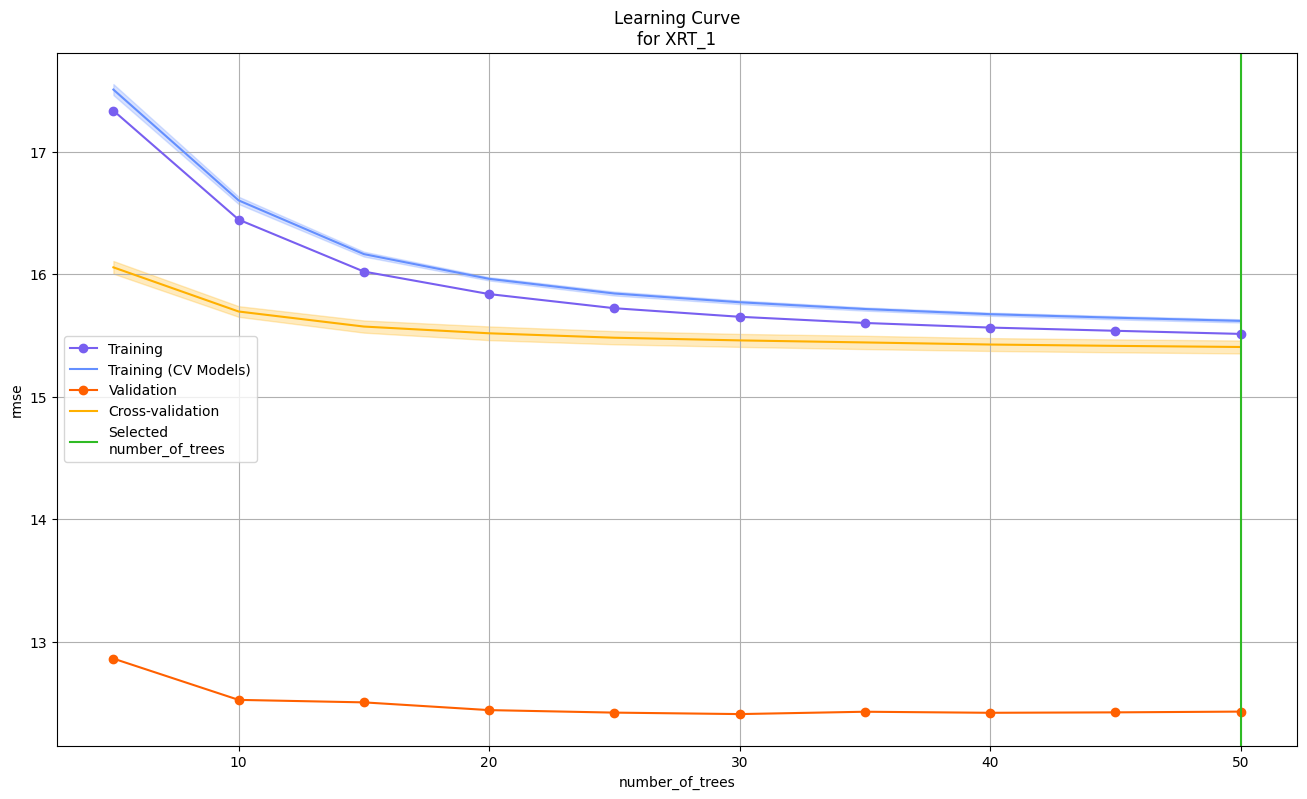

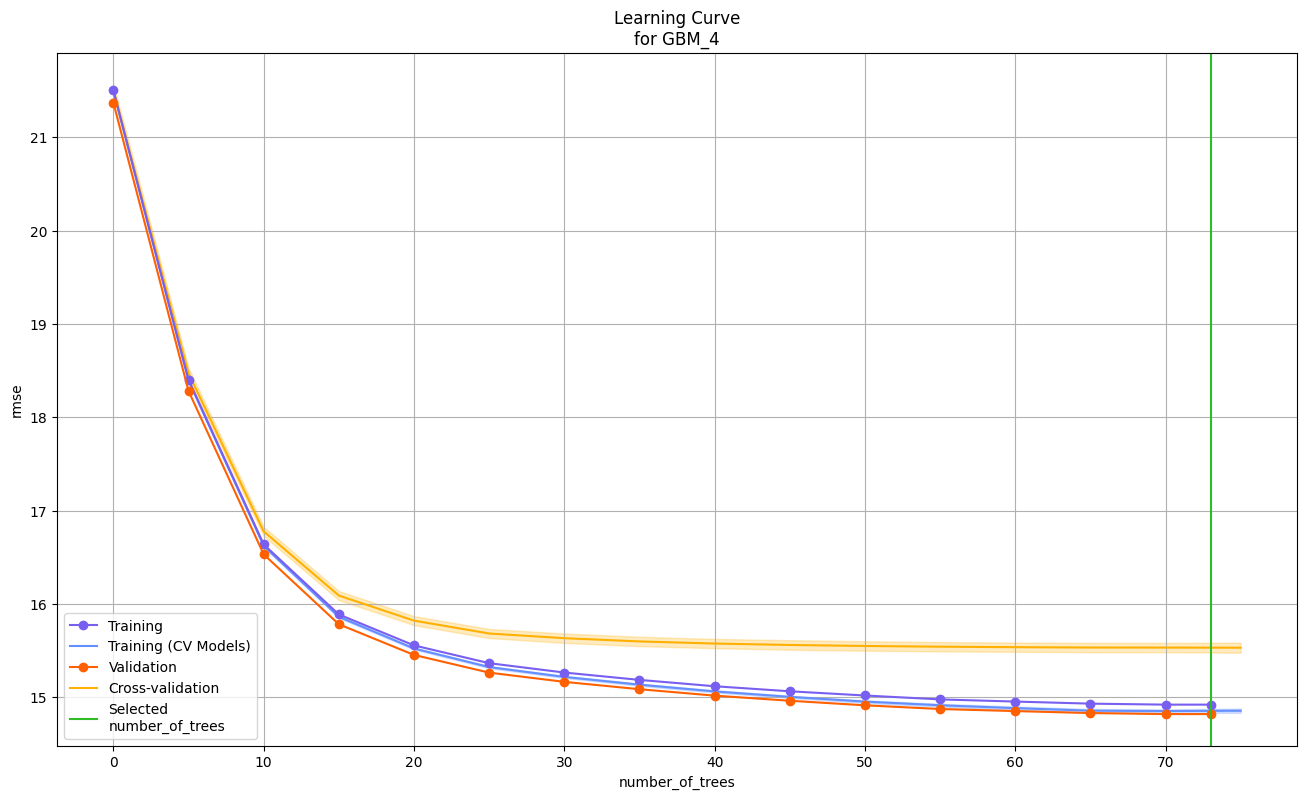

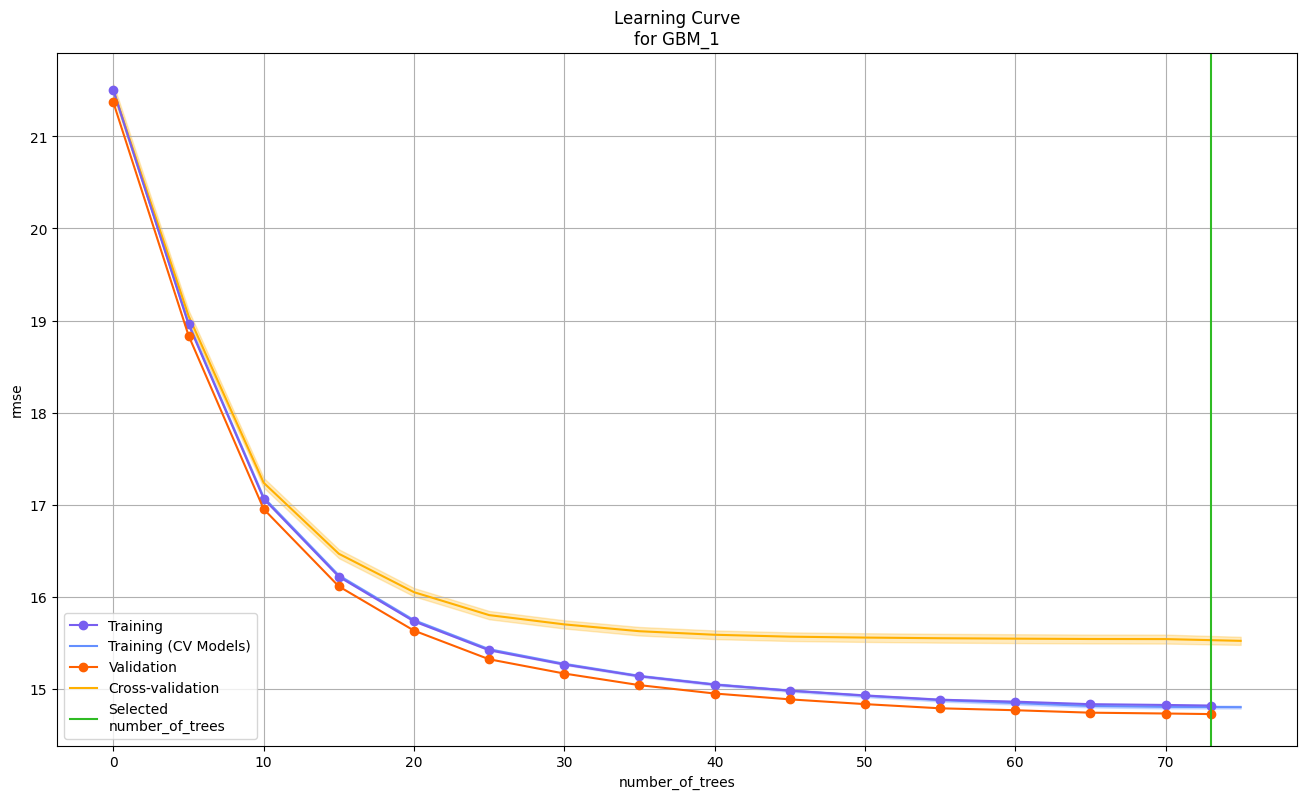

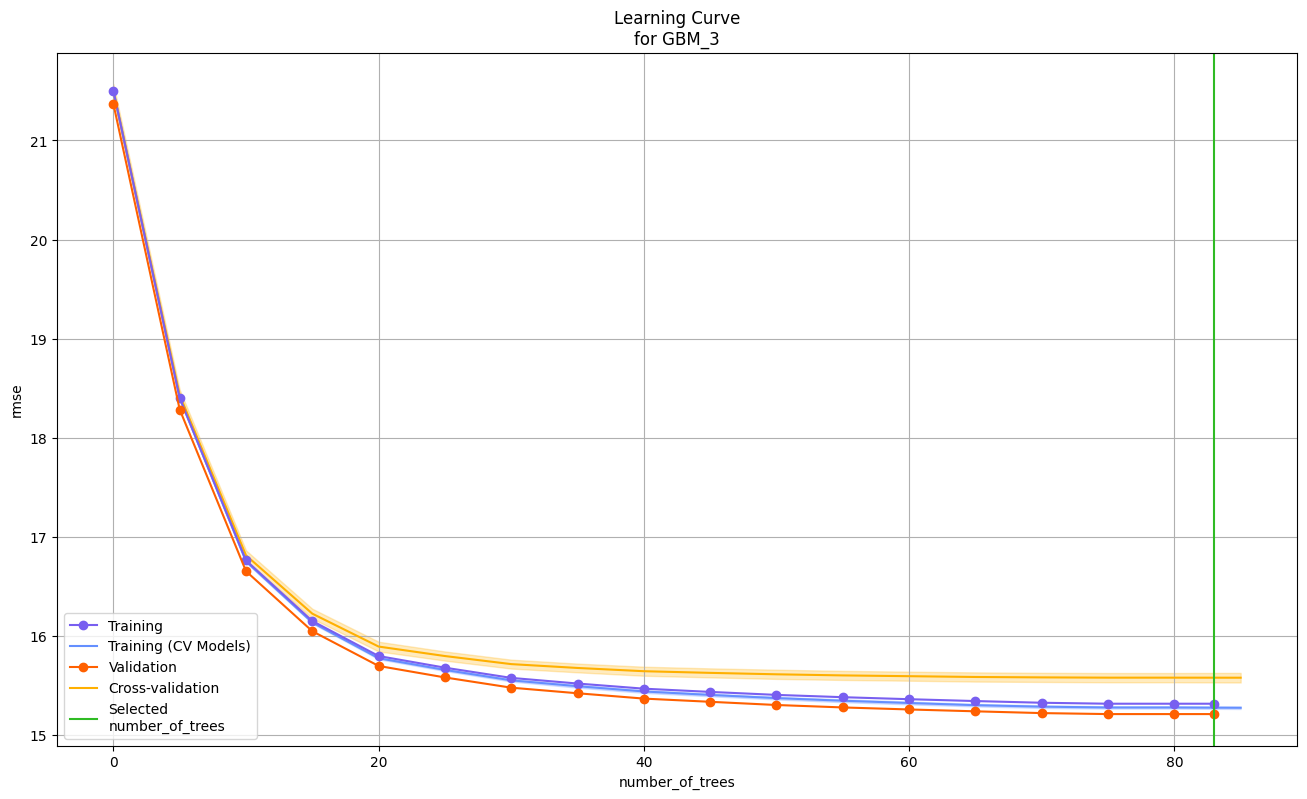

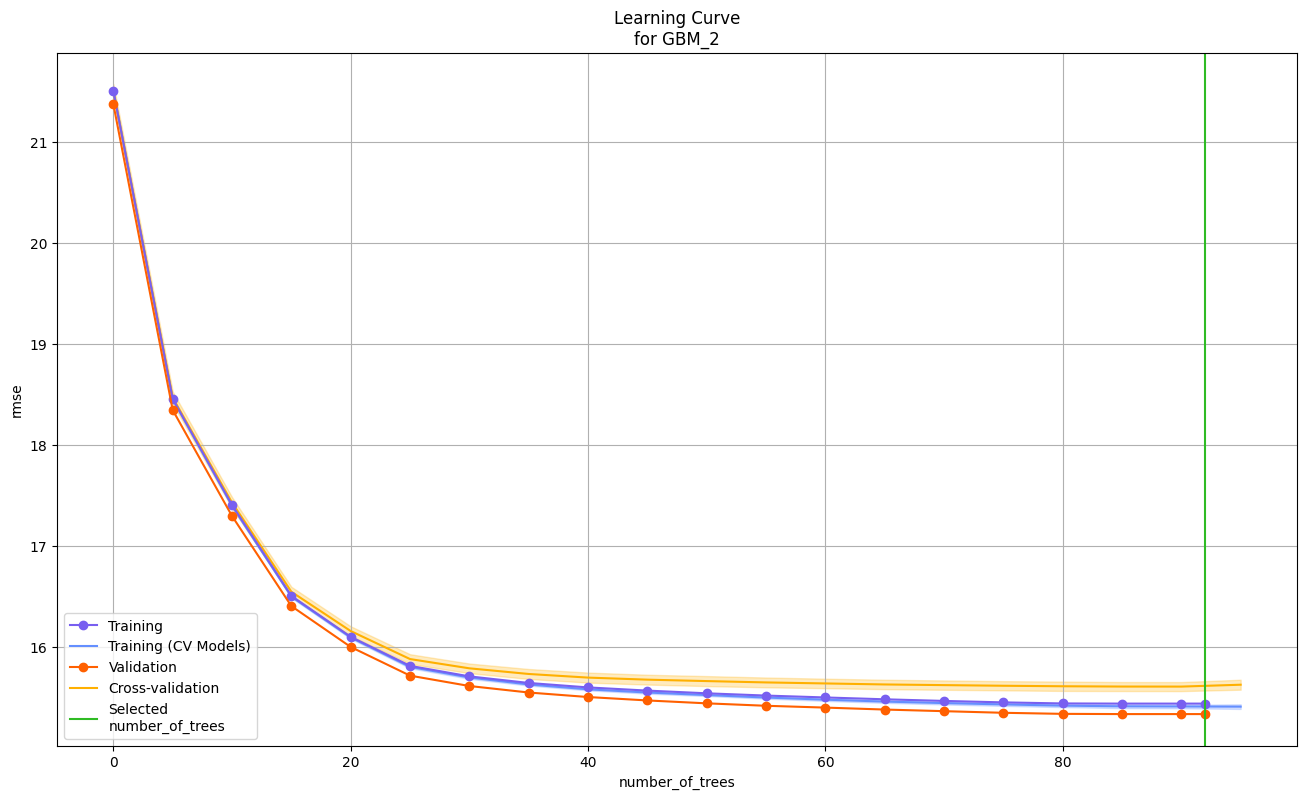

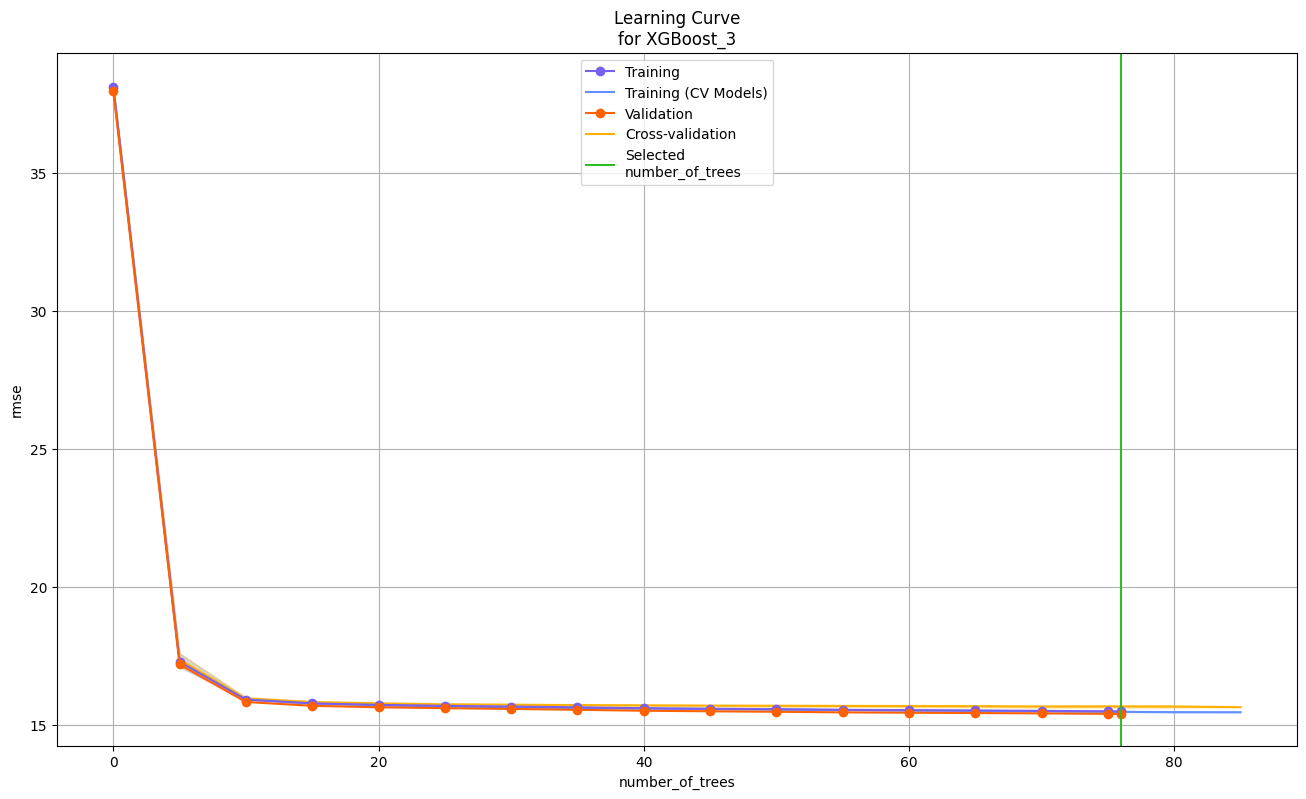

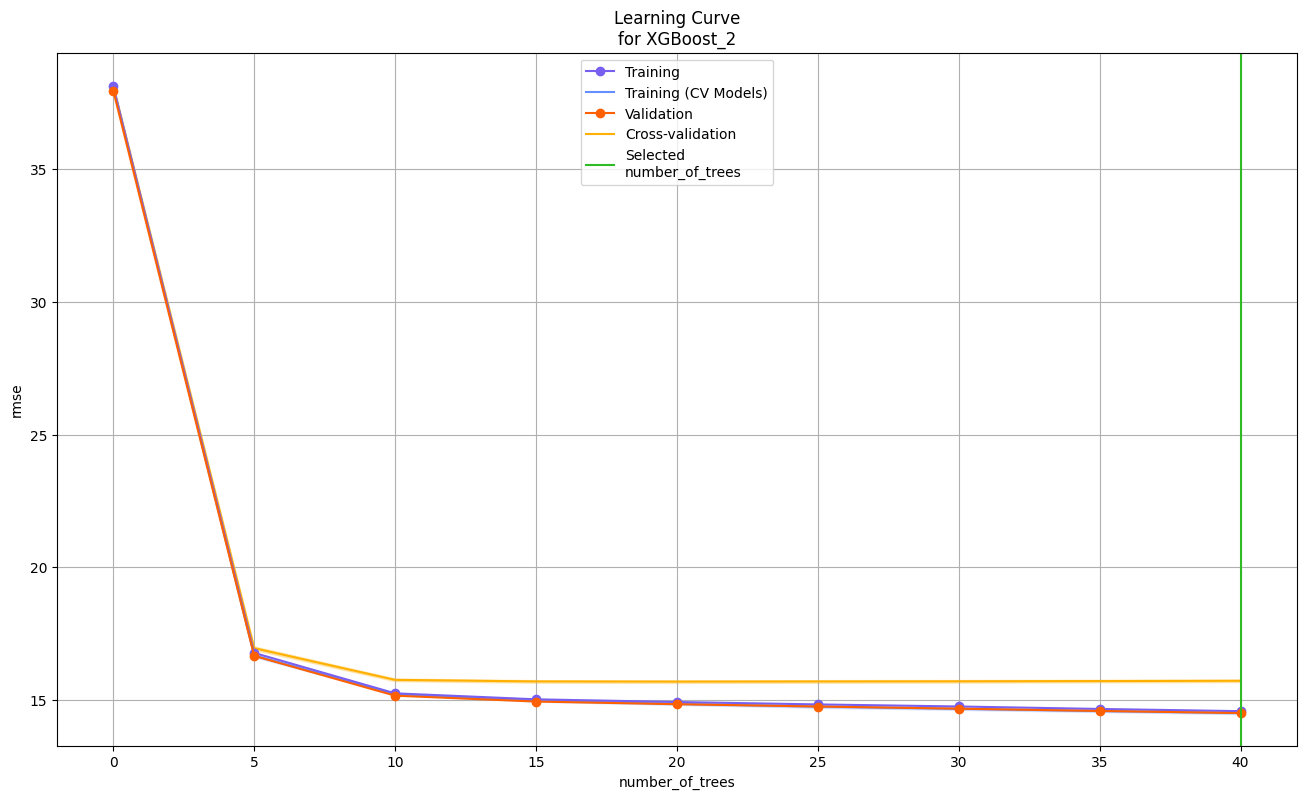

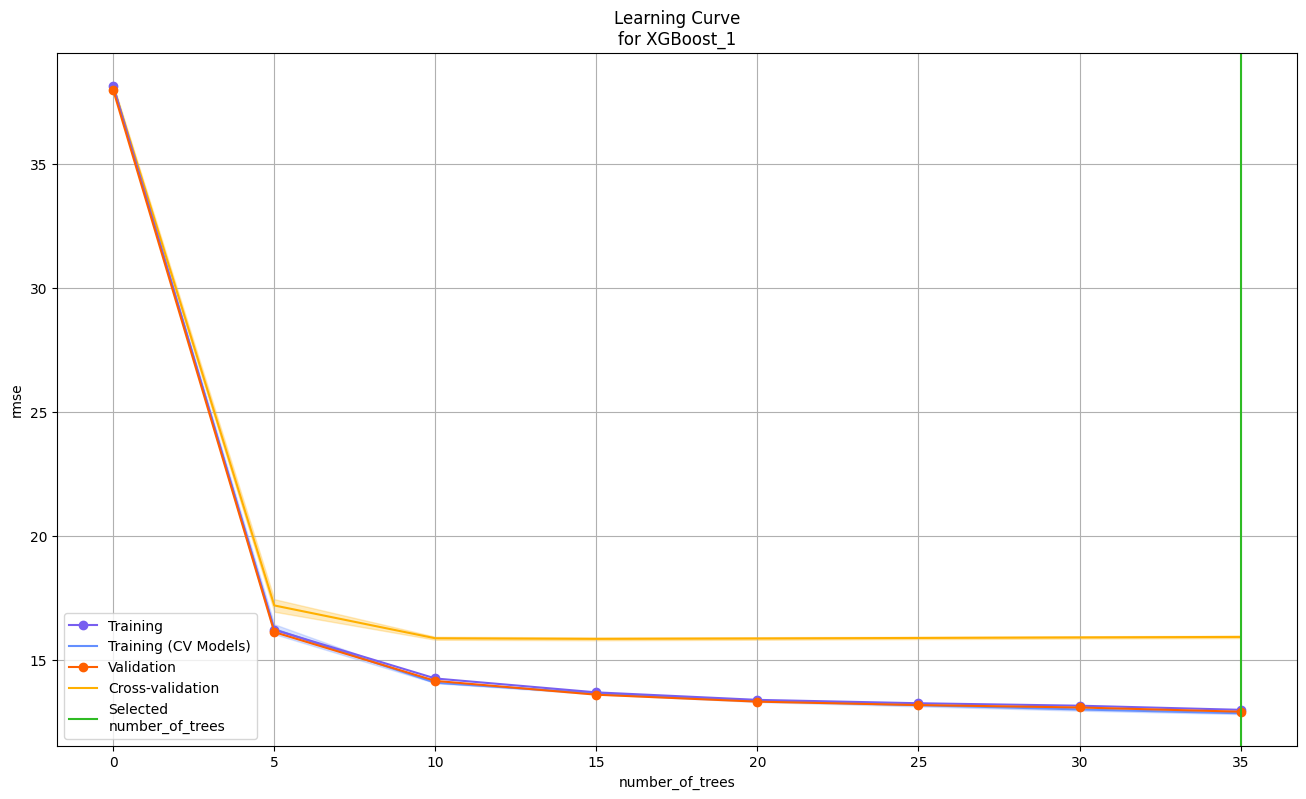

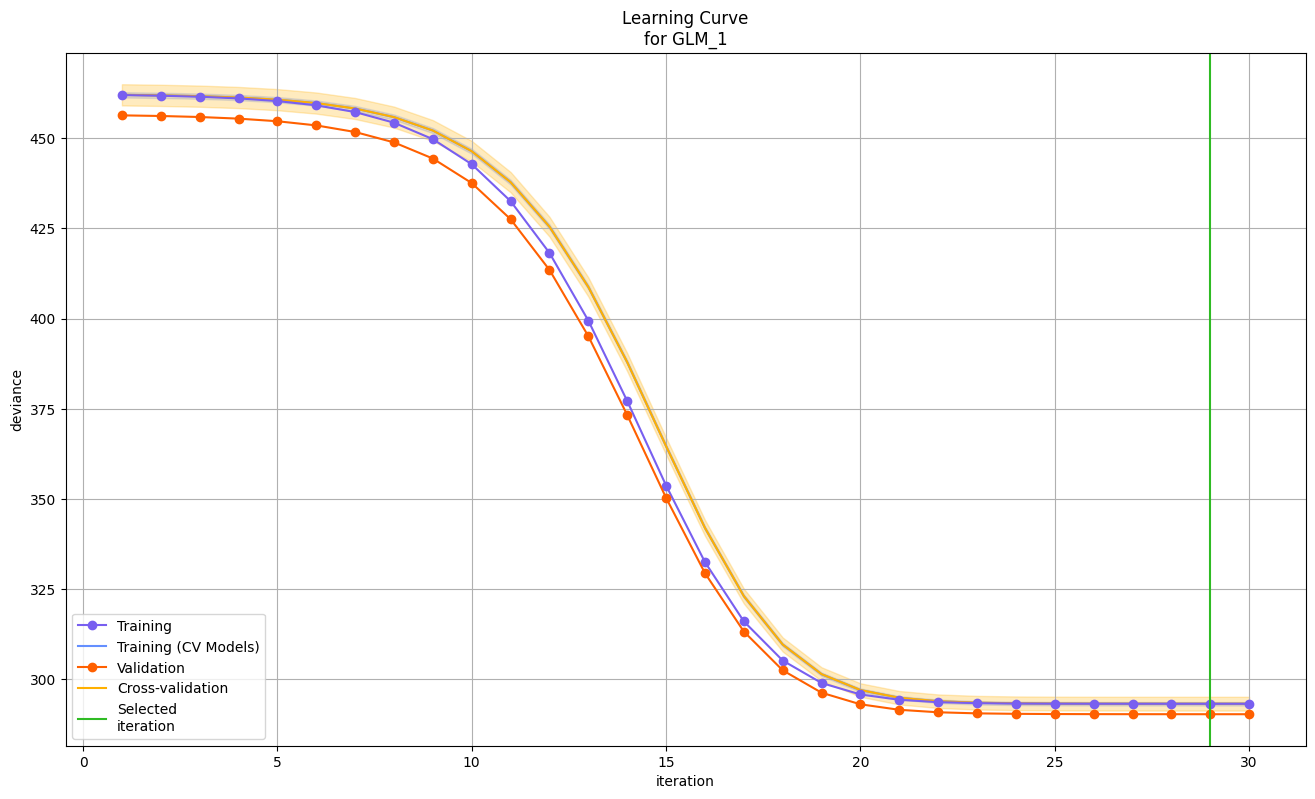

In [31]:
for model_id in model_ids:
  try:
    print(f"Model ID: {model_id}")
    learning_curve_plot = h2o.get_model(model_id).learning_curve_plot()
    aml_unit = h2o.get_model(model_id)
    perf = aml_unit.model_performance(valid)
    print(perf)
    print(f"R2 cross validation: {aml_unit.r2()}")
    print(f"R2 test validation: {aml_unit.r2(valid=True)}")
    # прогноз лидирующей моделю на валидационной выборке
    val_pred=aml_unit.predict(unseen).as_data_frame()
    # из валидационного датасеат возбму столбец Stay и сконвертиую его в пандас датафрейм
    val_test = unseen['Stay'].as_data_frame()
    r2_unseen = r2_score(val_test, val_pred)
    print(f"R2 unseen dataset validation: {r2_unseen}")
    print("-------------------\n-------------------")
  except:
    print(model_id, "- ERROR ANALYSIS")